# Quick start with Retentioneering

## Prerequisites

Run this cell to prepare the environment. This step is obligatory.

In [1]:
!pip install retentioneering

In [2]:
import retentioneering
import pandas as pd

The full text of [Quick start](https://doc.retentioneering.com/stable/doc/getting_started/quick_start.html) user guide is available on the retentioneering website.

## Loading data

In [3]:
from retentioneering import datasets

# load sample user behavior data:
stream = datasets.load_simple_shop()

In [4]:
stream.to_dataframe().head()

event_id  event_type  event_index       event  \
0  f60c27ac-9594-4dfc-a1da-e4c582c2b454  path_start            0  path_start   
1  f60c27ac-9594-4dfc-a1da-e4c582c2b454         raw            0     catalog   
2  e71839cc-4d6e-4e04-968f-6abdc5f2ab2c         raw            1    product1   
3  efb3dda5-1be9-41ea-8fa4-404bc65ee454         raw            2        cart   
4  5a216c24-7c89-42c1-a468-054149812654         raw            3     catalog   

                   timestamp    user_id  
0 2019-11-01 17:59:13.273932  219483890  
1 2019-11-01 17:59:13.273932  219483890  
2 2019-11-01 17:59:28.459271  219483890  
3 2019-11-01 17:59:29.502214  219483890  
4 2019-11-01 17:59:32.557029  219483890

## Preparing the data

In [5]:
# eventstream preprocessing example
stream \
    .split_sessions(timeout=(30, 'm')) \
    .filter_events(func=lambda df_, schema: df_['session_id'].str.endswith('_1')) \
    .to_dataframe() \
    .head()

event_id     event_type  event_index  \
0  f60c27ac-9594-4dfc-a1da-e4c582c2b454     path_start            0   
1  863ac884-8c5f-4805-9421-458627998ae7  session_start            0   
2  f60c27ac-9594-4dfc-a1da-e4c582c2b454            raw            0   
3  e71839cc-4d6e-4e04-968f-6abdc5f2ab2c            raw            1   
4  efb3dda5-1be9-41ea-8fa4-404bc65ee454            raw            2   

           event                  timestamp    user_id   session_id  
0     path_start 2019-11-01 17:59:13.273932  219483890  219483890_1  
1  session_start 2019-11-01 17:59:13.273932  219483890  219483890_1  
2        catalog 2019-11-01 17:59:13.273932  219483890  219483890_1  
3       product1 2019-11-01 17:59:28.459271  219483890  219483890_1  
4           cart 2019-11-01 17:59:29.502214  219483890  219483890_1

# Applying path analysis tools

## Transition graph

In [6]:
stream.transition_graph()

## Step matrix

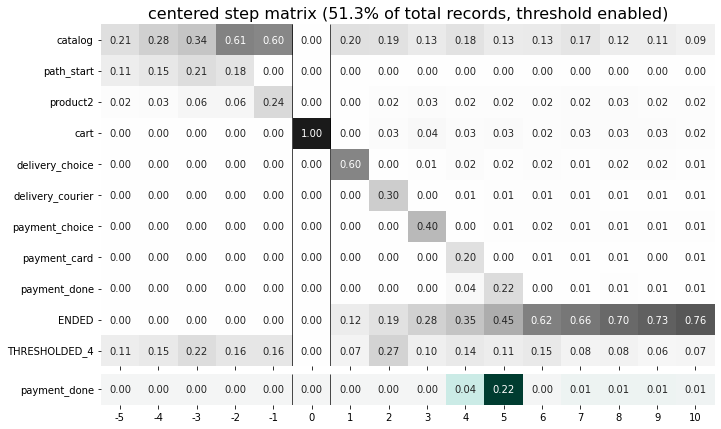

In [7]:
stream.step_matrix(
    max_steps=16,
    threshold=0.2,
    centered={
        'event': 'cart',
        'left_gap': 5,
        'occurrence': 1
    },
    targets=['payment_done']
)

## Step Sankey diagram

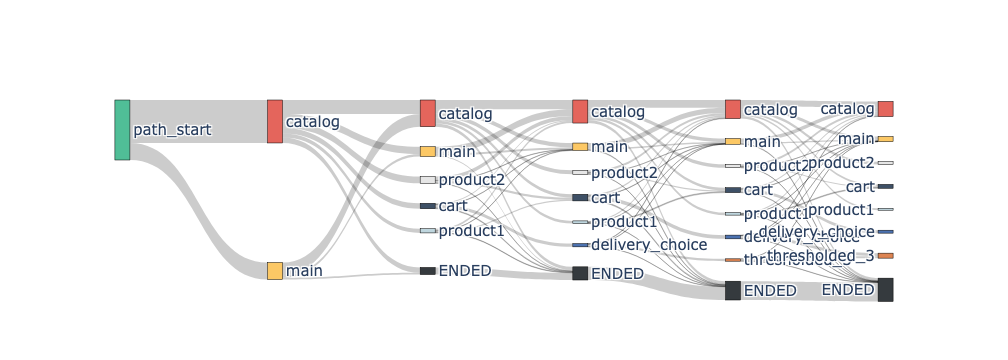

In [8]:
stream.step_sankey(max_steps=6, threshold=0.05)

## Cluster analysis

/Users/v.kukushkin/rete/retentioneering-tools-new-arch/retentioneering/tooling/clusters/clusters.py:922: UserWarning:

FixedFormatter should only be used together with FixedLocator



<Axes: xlabel='cluster_id', ylabel='value'>

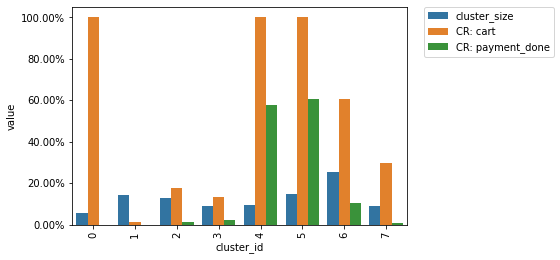

In [9]:
from retentioneering.tooling.clusters import Clusters

clusters = Clusters(stream)
features = clusters.extract_features(feature_type='tfidf', ngram_range=(1, 2))
clusters.fit(method='kmeans', n_clusters=8, X=features)
clusters.plot(targets=['payment_done', 'cart'])

## Funnel analysis

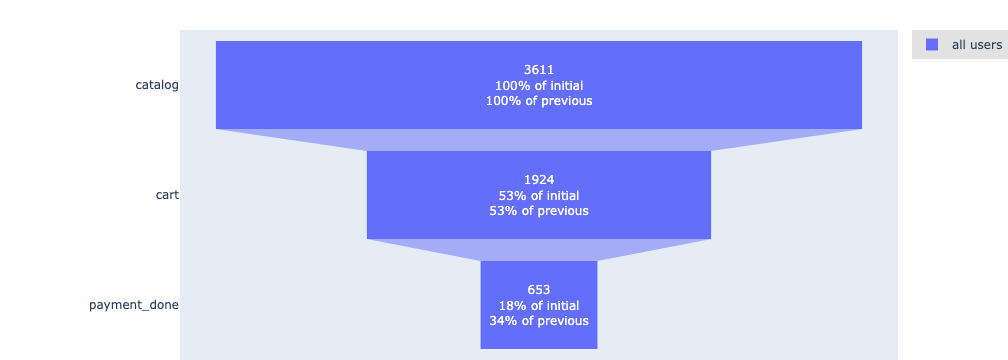

In [10]:
stream.funnel(stages=['catalog', 'cart', 'payment_done'])

## Cohort analysis

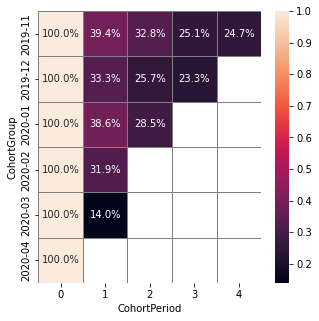

In [11]:
stream.cohorts(
    cohort_start_unit='M',
    cohort_period=(1, 'M'),
    average=False,
)

## Sequences

In [12]:
stream.sequences(
    ngram_range=(2, 3),
    threshold=['count', 1200],
    sample_size=3
)